In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier  
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold 

In [44]:
#Read csv data
census = pd.read_csv("Census.csv")

In [45]:
census.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [46]:
census1 = census.copy()
census1.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [47]:
#Data pre-processing, encoding textual data and replacing -9 with categorical number which does not skew the model.
#Dropping irrelavant coloumn (No of hous as a categorical column hours per week is already there).

census1['Region'] = LabelEncoder().fit_transform(census1['Region'])
census1['Residence Type'] = LabelEncoder().fit_transform(census1['Residence Type'])
census1['Family Composition'] = census1['Family Composition'].replace(-9, 0)
census1['Country of Birth'] = census1['Country of Birth'].replace(-9, 0)
census1['Health'] = census1['Health'].replace(-9, 0)
census1['Ethnic Group'] = census1['Ethnic Group'].replace(-9, 0)
census1['Religion'] = census1['Religion'].replace(-9, 0)
census1['Economic Activity'] = census1['Economic Activity'].replace(-9, 0)
census1['Occupation'] = census1['Occupation'].replace(-9, 0)
census1['Industry'] = census1['Industry'].replace(-9, 0)
census1['Hours worked per week'] = census1['Hours worked per week'].replace(-9, 0)
census1['Approximated Social Grade'] = census1['Approximated Social Grade'].replace(-9, 0)
census1 = census1.drop(columns=['No of hours'])
census1.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,0,1,2,1,2,6,2,2,1,2,1,2,5,8,2,0,4
1,7394832,0,1,3,1,2,1,1,2,1,2,1,1,0,0,0,0,0
2,7394719,0,1,2,1,1,7,2,2,1,1,1,2,5,8,2,0,2
3,7394840,0,1,1,1,2,6,4,2,1,3,1,2,5,9,5,0,4
4,7394711,0,1,2,1,1,1,1,1,1,1,1,1,0,0,0,0,0


In [48]:
X = census1.iloc[:, 1:-1]
y = census1.iloc[:, -1]

In [49]:
X.values

array([[ 0,  1,  2, ...,  8,  2,  0],
       [ 0,  1,  3, ...,  0,  0,  0],
       [ 0,  1,  2, ...,  8,  2,  0],
       ...,
       [ 7,  0,  0, ...,  1,  8,  4],
       [ 9,  1,  2, ...,  6, 10,  4],
       [ 9,  1,  1, ...,  5,  2,  4]], dtype=int64)

In [50]:
y.values

array([4, 0, 2, ..., 0, 3, 3], dtype=int64)

In [51]:
census1_sample, _ = train_test_split(census1, test_size=1 - 0.01, random_state=12)
X1 = census1_sample.iloc[:, 1:-1]
y1 = census1_sample.iloc[:, -1]

In [52]:
#Cross Validation funtion
def multiclass_cross_validation(model, X, y, cv=5, scoring='accuracy'):
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=1)
    scores = cross_val_score(model, X, y, cv=cv_strategy, scoring=scoring)
    return scores


In [53]:
#Confusion Matrix function
def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    if title:
        plt.title(title)
    plt.show()

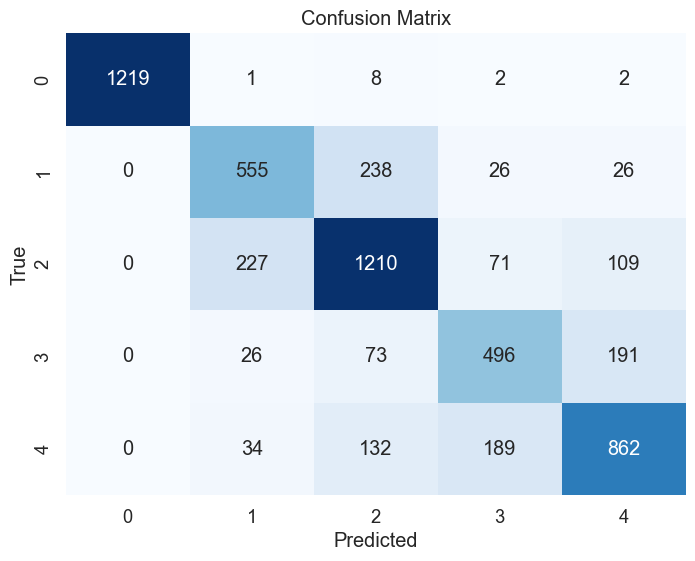

Decision Tree - Cross-Validation Accuracy: 0.7621555204493593
Decision Tree - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1232
           1       0.66      0.66      0.66       845
           2       0.73      0.75      0.74      1617
           3       0.63      0.63      0.63       786
           4       0.72      0.71      0.72      1217

    accuracy                           0.76      5697
   macro avg       0.75      0.75      0.75      5697
weighted avg       0.76      0.76      0.76      5697

Decision Tree - Cross-Validation F1 Scores: [0.75476695 0.73714555 0.75428409 0.76219869 0.7488206 ]
Decision Tree - Cross-Validation Average F1 Score with variance: (0.7514431771917176, 6.921988313180395e-05)


array([0.75476695, 0.73714555, 0.75428409, 0.76219869, 0.7488206 ])

In [54]:
def multiclass_cv_decision_tree(X, y, cv=5, scoring='f1_macro', max_depth=None, random_state=12):
    clf = DecisionTreeClassifier(max_depth=max_depth)

    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=cv_strategy, scoring=scoring)
    
    y_pred = cross_val_predict(clf, X, y, cv=cv_strategy)

    accuracy = accuracy_score(y, y_pred)
    classification_rep = classification_report(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')
    plot_confusion_matrix(y, y_pred, classes=sorted(y.unique().tolist()), title='Confusion Matrix')
    print("Decision Tree - Cross-Validation Accuracy:", accuracy)
    print("Decision Tree - Cross-Validation Classification Report:\n", classification_rep)
    print("Decision Tree - Cross-Validation F1 Scores:", scores)
    print("Decision Tree - Cross-Validation Average F1 Score with variance:", (scores.mean(), scores.std() **2))
    return scores
multiclass_cv_decision_tree(X1, y1)


In [55]:
X1.values

array([[2, 1, 2, ..., 5, 2, 2],
       [6, 1, 2, ..., 0, 0, 0],
       [1, 1, 2, ..., 3, 2, 3],
       ...,
       [7, 1, 2, ..., 5, 6, 3],
       [6, 1, 2, ..., 0, 0, 0],
       [1, 1, 2, ..., 9, 6, 3]], dtype=int64)

In [56]:
y1.values

array([3, 4, 2, ..., 3, 0, 4], dtype=int64)

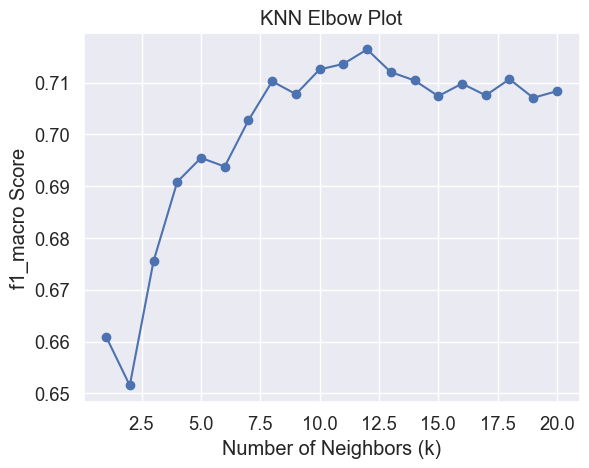

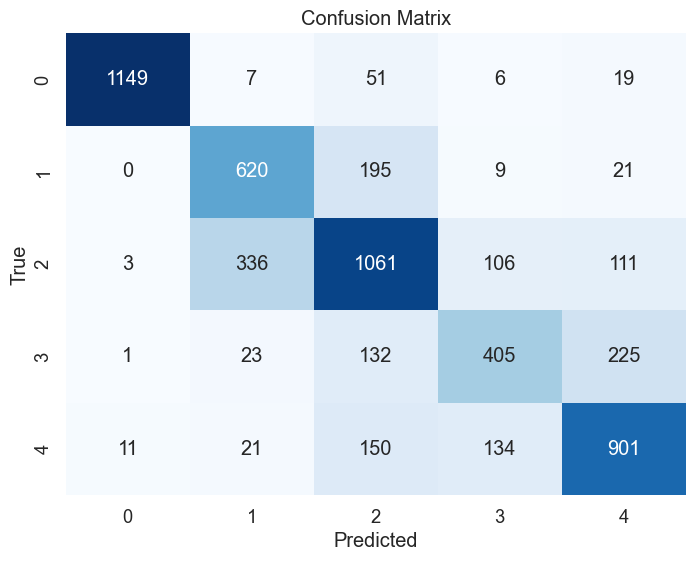

Optimal k: 12
KNN - Cross-Validation Accuracy: 0.7259961383184133
KNN - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1232
           1       0.62      0.73      0.67       845
           2       0.67      0.66      0.66      1617
           3       0.61      0.52      0.56       786
           4       0.71      0.74      0.72      1217

    accuracy                           0.73      5697
   macro avg       0.72      0.72      0.71      5697
weighted avg       0.73      0.73      0.73      5697

KNN - Cross-Validation F1 Scores: [0.70854423 0.72346883 0.70549575 0.73309522 0.72214451 0.68753403
 0.70308315 0.7227186  0.7289938  0.70968457]
KNN - Cross-Validation Average F1 Score with variance: (0.7144762688290444, 0.00017595146327251959)


array([0.70854423, 0.72346883, 0.70549575, 0.73309522, 0.72214451,
       0.68753403, 0.70308315, 0.7227186 , 0.7289938 , 0.70968457])

In [57]:
def knn_elbow_cv(X, y, cv=10, scoring='f1_macro', random_state=12, max_neighbors=20):
    cv_scores = []

    # Range of neighbors (k) to consider
    neighbors_range = range(1, max_neighbors + 1)

    for k in neighbors_range:
        clf = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(clf, X, y, cv=cv, scoring=scoring)
        cv_scores.append(scores.mean())
    
    # Find the optimal number of neighbors (k) using the elbow method
    optimal_k = neighbors_range[np.argmax(cv_scores)]

    # Plot the elbow curve
    plt.figure()
    plt.plot(neighbors_range, cv_scores, marker='o', linestyle='-')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel(f'{scoring} Score')
    plt.title('KNN Elbow Plot')
    plt.grid(True)
    plt.show()

    # Train a KNN classifier with the optimal k
    optimal_clf = KNeighborsClassifier(n_neighbors=optimal_k)
    
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    scores = cross_val_score(optimal_clf, X, y, cv=cv_strategy, scoring=scoring)
    y_pred = cross_val_predict(optimal_clf, X, y, cv=cv_strategy)

    accuracy = accuracy_score(y, y_pred)
    classification_rep = classification_report(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')

    plot_confusion_matrix(y, y_pred, classes=sorted(y.unique().tolist()), title='Confusion Matrix')

    print(f"Optimal k: {optimal_k}")

    print("KNN - Cross-Validation Accuracy:", accuracy)
    print("KNN - Cross-Validation Classification Report:\n", classification_rep)
    print("KNN - Cross-Validation F1 Scores:", scores)
    print("KNN - Cross-Validation Average F1 Score with variance:", (scores.mean(), scores.std() **2))
    return scores
knn_elbow_cv(X1,y1)


C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

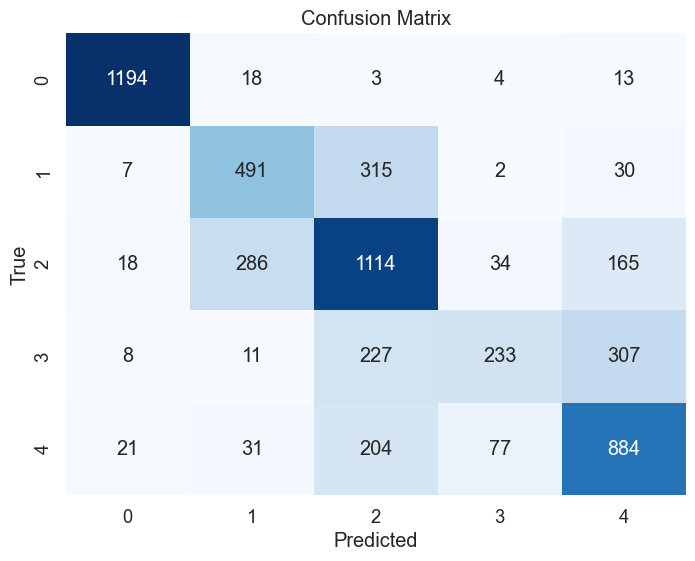

Logistic - Cross-Validation Accuracy: 0.6873793224504124
Logistic - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1232
           1       0.59      0.58      0.58       845
           2       0.60      0.69      0.64      1617
           3       0.67      0.30      0.41       786
           4       0.63      0.73      0.68      1217

    accuracy                           0.69      5697
   macro avg       0.69      0.65      0.65      5697
weighted avg       0.69      0.69      0.68      5697

Logistic - Cross-Validation F1 Scores: [0.59344481 0.64770924 0.70406302 0.64834535 0.64039585 0.6622356
 0.66982282 0.64774012 0.65622921 0.67115123]
Logistic - Cross-Validation Average F1 Score with variance: (0.6541137250747728, 0.0007086236056121197)


array([0.59344481, 0.64770924, 0.70406302, 0.64834535, 0.64039585,
       0.6622356 , 0.66982282, 0.64774012, 0.65622921, 0.67115123])

In [58]:

def multiclass_cv_logistic_regression(X, y, cv=10, scoring='f1_macro', random_state=12, solver='lbfgs', max_iter=100):

    clf = LogisticRegression(solver=solver, max_iter=max_iter, random_state=random_state)
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=cv_strategy, scoring=scoring)

    y_pred = cross_val_predict(clf, X, y, cv=cv_strategy)

    accuracy = accuracy_score(y, y_pred)
    classification_rep = classification_report(y, y_pred)
    f1 = f1_score(y, y_pred, average='weighted')
    plot_confusion_matrix(y, y_pred, classes=sorted(y.unique().tolist()), title='Confusion Matrix')
    print("Logistic - Cross-Validation Accuracy:", accuracy)
    print("Logistic - Cross-Validation Classification Report:\n", classification_rep)
    print("Logistic - Cross-Validation F1 Scores:", scores)
    print("Logistic - Cross-Validation Average F1 Score with variance:", (scores.mean(), scores.std() **2))
    return scores
  

# Example usage:
multiclass_cv_logistic_regression(X1, y1)


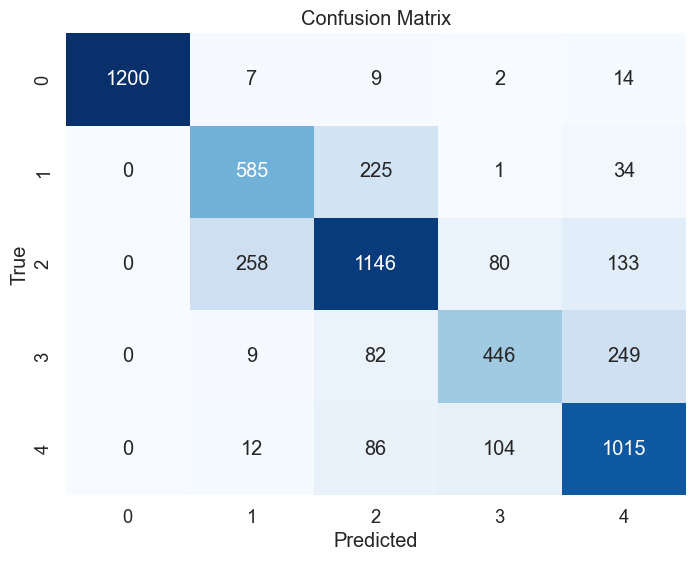

SVM - Cross-Validation Accuracy: 0.7709320695102686
SVM - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1232
           1       0.67      0.69      0.68       845
           2       0.74      0.71      0.72      1617
           3       0.70      0.57      0.63       786
           4       0.70      0.83      0.76      1217

    accuracy                           0.77      5697
   macro avg       0.76      0.76      0.76      5697
weighted avg       0.77      0.77      0.77      5697

SVM - Cross-Validation F1 Scores: [0.7844497  0.74273344 0.74002366 0.76182671 0.76718925 0.74425841
 0.75506736 0.74524262 0.76851246 0.75663403]
SVM - Cross-Validation Average F1 Score with variance: (0.7565937649863699, 0.00018076746938859868)


array([0.7844497 , 0.74273344, 0.74002366, 0.76182671, 0.76718925,
       0.74425841, 0.75506736, 0.74524262, 0.76851246, 0.75663403])

In [59]:
def multiclass_cv_svm(X, y, cv=10, scoring='f1_macro', random_state=12, kernel='rbf', C=1.0, gamma='scale'):

    clf = SVC(kernel=kernel, C=C, gamma=gamma, random_state=random_state)
    
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=1)
    scores = cross_val_score(clf, X, y, cv=cv_strategy, scoring=scoring)

    
    y_pred = cross_val_predict(clf, X, y, cv=cv_strategy)

    accuracy = accuracy_score(y, y_pred)
    classification_rep = classification_report(y, y_pred)

    plot_confusion_matrix(y, y_pred, classes=sorted(y.unique().tolist()), title='Confusion Matrix')
    print("SVM - Cross-Validation Accuracy:", accuracy)
    print("SVM - Cross-Validation Classification Report:\n", classification_rep)
    print("SVM - Cross-Validation F1 Scores:", scores)
    print("SVM - Cross-Validation Average F1 Score with variance:", (scores.mean(), scores.std() **2))
    return scores

multiclass_cv_svm(X1, y1)


C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\A

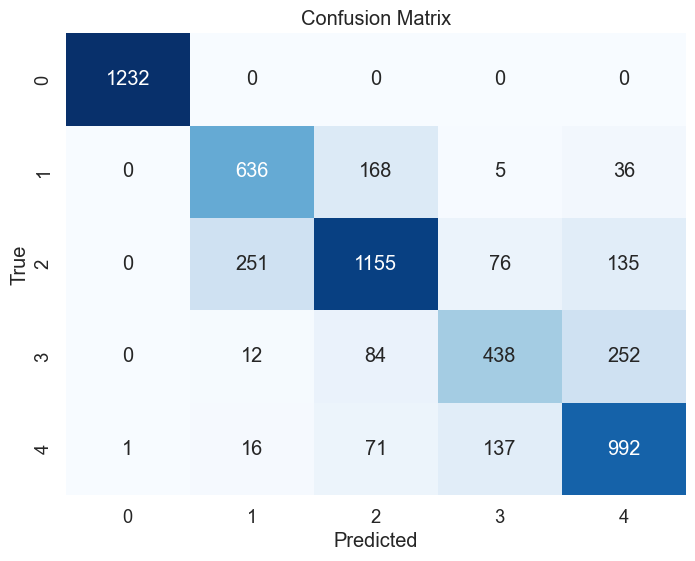

MLP - Accuracy: 0.7816394593645778
MLP - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       0.70      0.75      0.72       845
           2       0.78      0.71      0.75      1617
           3       0.67      0.56      0.61       786
           4       0.70      0.82      0.75      1217

    accuracy                           0.78      5697
   macro avg       0.77      0.77      0.77      5697
weighted avg       0.78      0.78      0.78      5697

MLP - Cross-Validation F1 Scores: [0.78542919 0.74309365 0.76336977 0.76816017 0.79204677 0.72704177
 0.76487813 0.77133312 0.77738755 0.76223281]
MLP - Cross-Validation Average F1 Score with variance: (0.7654972935928697, 0.00032809979494674275)


array([0.78542919, 0.74309365, 0.76336977, 0.76816017, 0.79204677,
       0.72704177, 0.76487813, 0.77133312, 0.77738755, 0.76223281])

In [60]:
def multiclass_cv_mlp(X, y, cv=10, scoring='f1_macro', hidden_layer_sizes=(100,), max_iter=100, random_state=12):
 

    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=random_state)
    
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=1)
    scores = cross_val_score(clf, X, y, cv=cv_strategy, scoring=scoring)


    
    y_pred = cross_val_predict(clf, X, y, cv=cv_strategy)

    accuracy = accuracy_score(y, y_pred)
    classification_rep = classification_report(y, y_pred)

    plot_confusion_matrix(y, y_pred, classes=sorted(y.unique().tolist()), title='Confusion Matrix')
    print(f"MLP - Accuracy: {accuracy}")
    print("MLP - Classification Report:")
    print(classification_rep)
    print("MLP - Cross-Validation F1 Scores:", scores)
    print("MLP - Cross-Validation Average F1 Score with variance:", (scores.mean(), scores.std() **2))
    return scores

# Example usage
multiclass_cv_mlp(X1, y1)

C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nadon\A

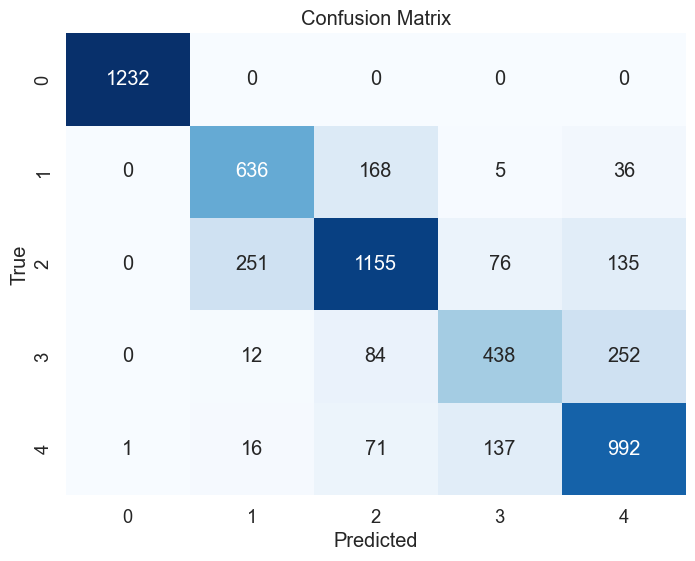

MLP - Accuracy: 0.7816394593645778
MLP - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       0.70      0.75      0.72       845
           2       0.78      0.71      0.75      1617
           3       0.67      0.56      0.61       786
           4       0.70      0.82      0.75      1217

    accuracy                           0.78      5697
   macro avg       0.77      0.77      0.77      5697
weighted avg       0.78      0.78      0.78      5697

MLP - Cross-Validation F1 Scores: [0.78542919 0.74309365 0.76336977 0.76816017 0.79204677 0.72704177
 0.76487813 0.77133312 0.77738755 0.76223281]
MLP - Cross-Validation Average F1 Score with variance: (0.7654972935928697, 0.00032809979494674275)


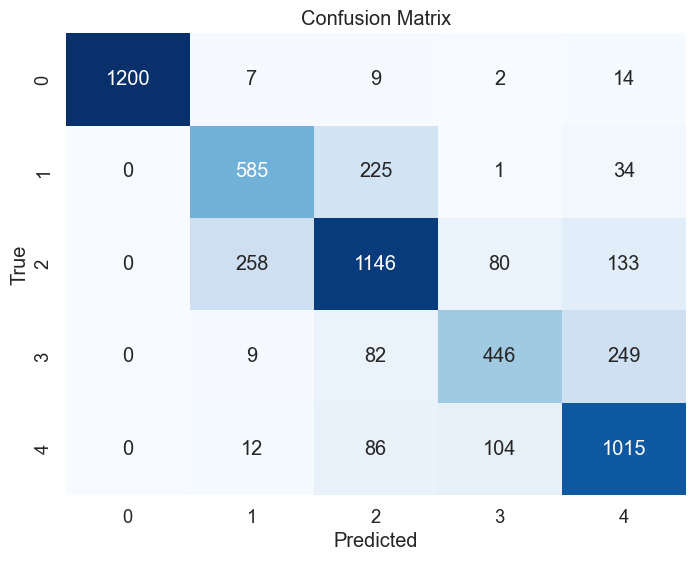

SVM - Cross-Validation Accuracy: 0.7709320695102686
SVM - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1232
           1       0.67      0.69      0.68       845
           2       0.74      0.71      0.72      1617
           3       0.70      0.57      0.63       786
           4       0.70      0.83      0.76      1217

    accuracy                           0.77      5697
   macro avg       0.76      0.76      0.76      5697
weighted avg       0.77      0.77      0.77      5697

SVM - Cross-Validation F1 Scores: [0.7844497  0.74273344 0.74002366 0.76182671 0.76718925 0.74425841
 0.75506736 0.74524262 0.76851246 0.75663403]
SVM - Cross-Validation Average F1 Score with variance: (0.7565937649863699, 0.00018076746938859868)


C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

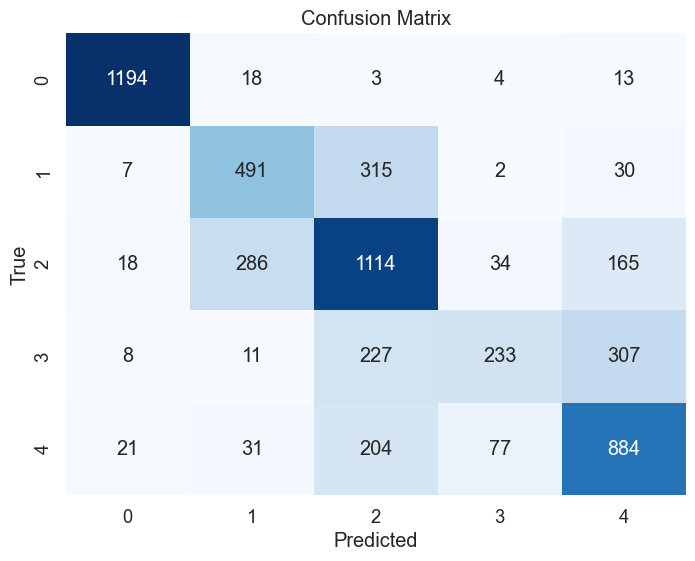

Logistic - Cross-Validation Accuracy: 0.6873793224504124
Logistic - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1232
           1       0.59      0.58      0.58       845
           2       0.60      0.69      0.64      1617
           3       0.67      0.30      0.41       786
           4       0.63      0.73      0.68      1217

    accuracy                           0.69      5697
   macro avg       0.69      0.65      0.65      5697
weighted avg       0.69      0.69      0.68      5697

Logistic - Cross-Validation F1 Scores: [0.59344481 0.64770924 0.70406302 0.64834535 0.64039585 0.6622356
 0.66982282 0.64774012 0.65622921 0.67115123]
Logistic - Cross-Validation Average F1 Score with variance: (0.6541137250747728, 0.0007086236056121197)


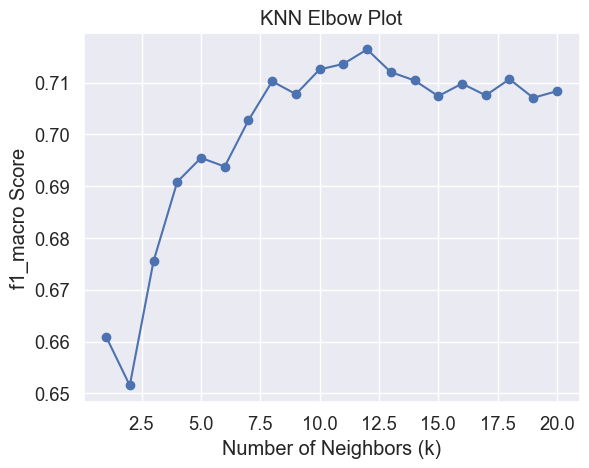

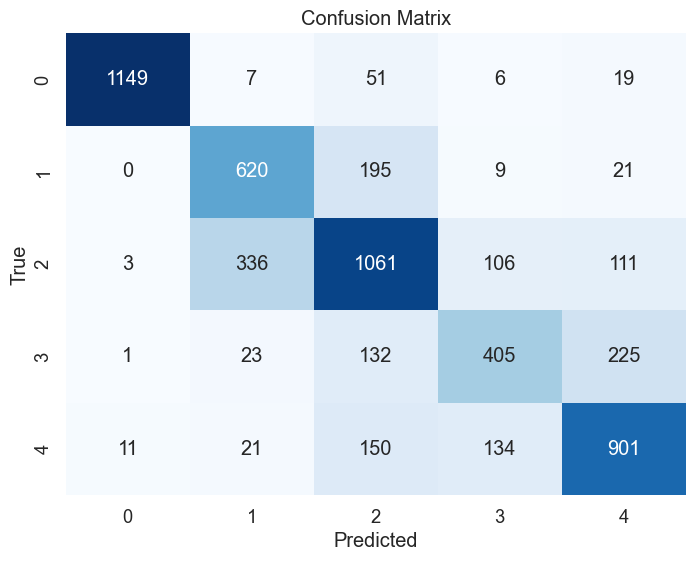

Optimal k: 12
KNN - Cross-Validation Accuracy: 0.7259961383184133
KNN - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1232
           1       0.62      0.73      0.67       845
           2       0.67      0.66      0.66      1617
           3       0.61      0.52      0.56       786
           4       0.71      0.74      0.72      1217

    accuracy                           0.73      5697
   macro avg       0.72      0.72      0.71      5697
weighted avg       0.73      0.73      0.73      5697

KNN - Cross-Validation F1 Scores: [0.70854423 0.72346883 0.70549575 0.73309522 0.72214451 0.68753403
 0.70308315 0.7227186  0.7289938  0.70968457]
KNN - Cross-Validation Average F1 Score with variance: (0.7144762688290444, 0.00017595146327251959)


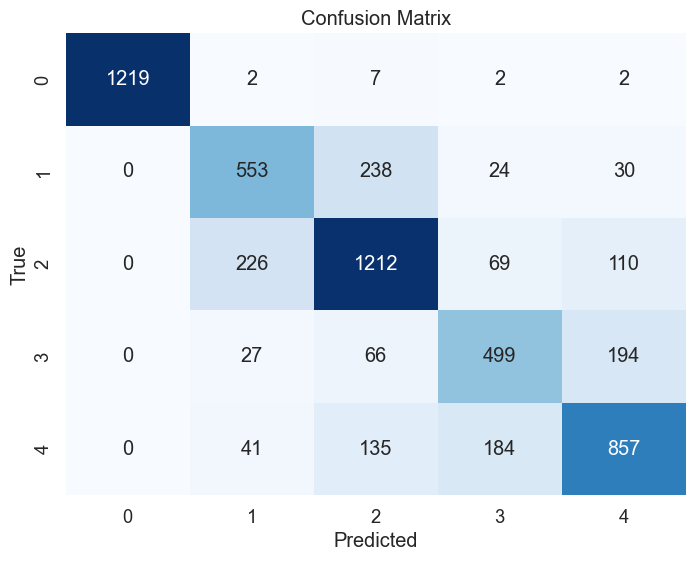

Decision Tree - Cross-Validation Accuracy: 0.7618044584869229
Decision Tree - Cross-Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1232
           1       0.65      0.65      0.65       845
           2       0.73      0.75      0.74      1617
           3       0.64      0.63      0.64       786
           4       0.72      0.70      0.71      1217

    accuracy                           0.76      5697
   macro avg       0.75      0.75      0.75      5697
weighted avg       0.76      0.76      0.76      5697

Decision Tree - Cross-Validation F1 Scores: [0.75437521 0.74702247 0.73711354 0.75579185 0.73820622]
Decision Tree - Cross-Validation Average F1 Score with variance: (0.7465018578980145, 6.110452840159467e-05)


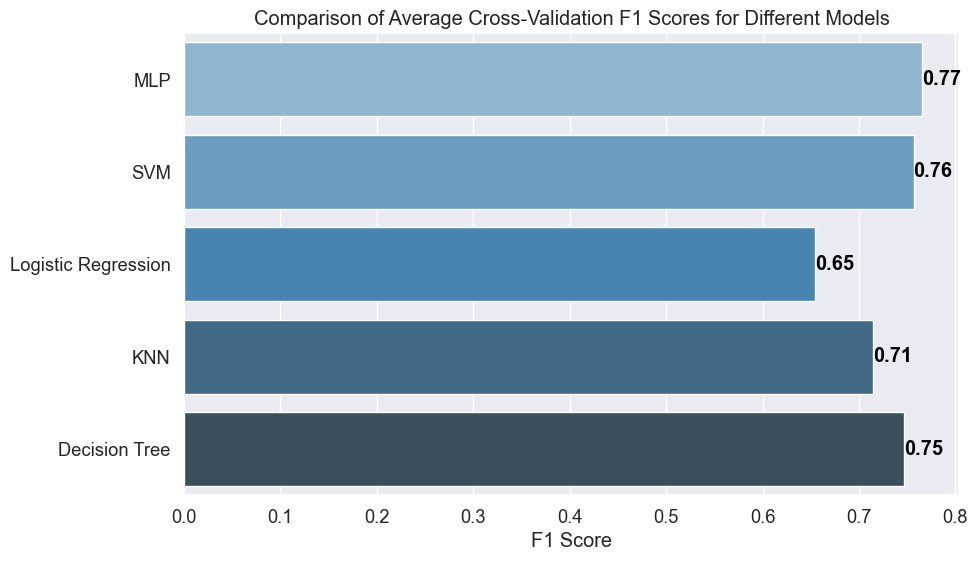

In [61]:
f1_scores = []
functions = [multiclass_cv_mlp, multiclass_cv_svm, multiclass_cv_logistic_regression, knn_elbow_cv, multiclass_cv_decision_tree]

for func in functions:
    f1 = func(X1, y1).mean()
    f1_scores.append(f1)

# Create labels for the bar plot
labels = ["MLP", "SVM", "Logistic Regression", "KNN", "Decision Tree"]

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=f1_scores, y=labels, palette="Blues_d")
plt.xlabel('F1 Score')
plt.title('Comparison of Average Cross-Validation F1 Scores for Different Models')

# Add values on top of the bars with 2 decimal places
for i, v in enumerate(f1_scores):
    ax.text(v, i, f'{v:.2f}', va='center', color='black', fontweight='bold')

plt.show()